# `pauc`: A Python Library for ROC Curve Analysis
This notebook provides a comprehensive guide to using the pauc library for Receiver Operating Characteristic (ROC) curve analysis. We will cover everything from creating and plotting basic ROC curves to advanced topics like statistical comparison, confidence intervals, multi-class analysis, and power calculations.

## 1\. Installation

First, you'll need to install the `pauc` library. You can typically do this using `pip`:

```python
!pip install pauc
```

## 2\. Creating a Basic ROC Curve

The core of the `pauc` library is the `ROC` class, which is used to create and analyze ROC curves. Let's start by creating a simple ROC curve from some sample data.

In [1]:
import numpy as np
import pauc

# Sample data
y_true = np.random.randint(2, size=100)
y_proba = np.random.rand(100)

# Create a ROC object
roc = pauc.ROC(y_true, y_proba, name='Model 1')

# Print a summary of the ROC curve
print(roc)

ROC curve 'Model 1':
 - 57 cases, 43 controls
 - AUC: 0.443


This will output a summary of your ROC curve, including the number of cases and controls, and the Area Under the Curve (AUC).

### Understanding the `ROC` Object

The `ROC` object has several useful attributes:

  * `roc.auc`: The Area Under the ROC Curve.
  * `roc.fpr`: An array of False Positive Rates.
  * `roc.tpr`: An array of True Positive Rates.
  * `roc.thresholds`: The thresholds used to calculate the FPR and TPR.
  * `roc.n_cases`: The number of positive samples.
  * `roc.n_controls`: The number of negative samples.

You can access these attributes directly:

In [2]:
print(f"AUC: {roc.auc:.3f}")

AUC: 0.443


## 3\. Plotting ROC Curves

Visualizing ROC curves is essential for understanding model performance. The `pauc` library provides a simple function, `plot_roc`, to do this.

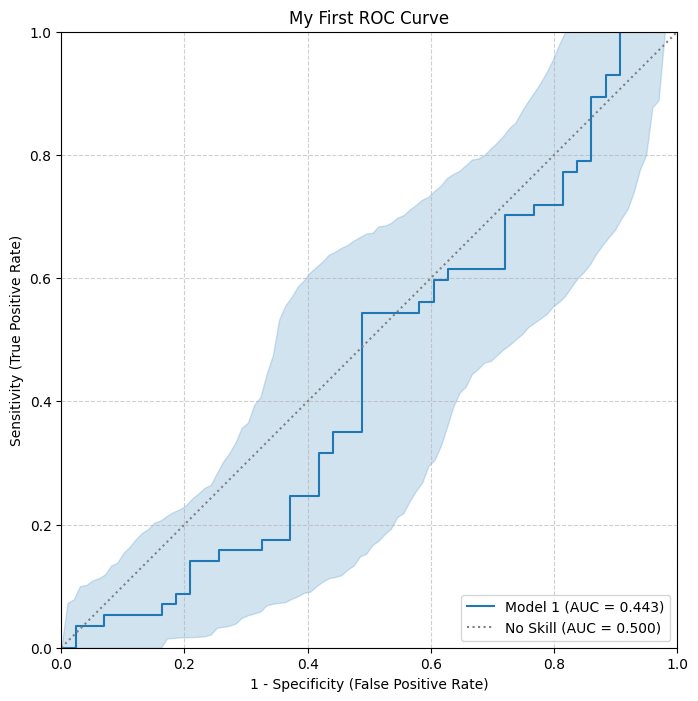

In [3]:
# Plot a single ROC curve
pauc.plot_roc(roc, title='My First ROC Curve')

You can also plot multiple ROC curves on the same axes and customize the plot.

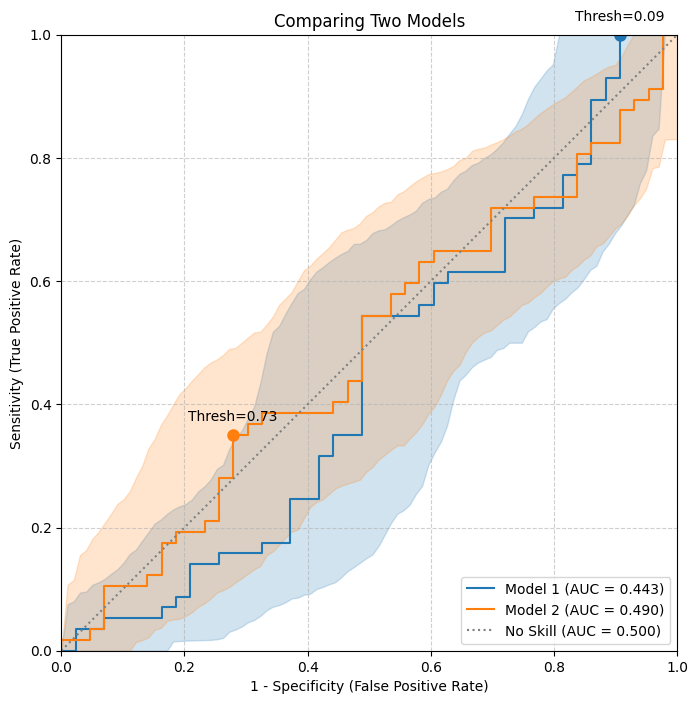

In [4]:
# Create a second ROC curve for comparison
y_proba2 = np.random.rand(100)
roc2 = pauc.ROC(y_true, y_proba2, name='Model 2')

# Plot both ROC curves
pauc.plot_roc([roc, roc2], title='Comparing Two Models', plot_ci=True, annotate_best=True)

The `plot_roc` function has several useful parameters:

  * `plot_ci`: If `True`, plots the confidence interval for the curve.
  * `annotate_best`: If `True`, marks and annotates the point on the curve with the "best" threshold (closest to the top-left corner).

## 4\. Comparing ROC Curves

A common task in ROC analysis is to determine if the difference in AUC between two models is statistically significant. The `compare` function allows you to do this.

In [5]:
# Compare the two ROC curves using DeLong's test
comparison_result = pauc.compare(roc, roc2, method='delong')
print(comparison_result)

DeLong's test for two correlated ROC curves

data:  Model 1 and Model 2
Z = -0.489, p-value = 0.625
alternative hypothesis: true difference in AUC is not equal to 0
95 percent confidence interval:
 -0.231 0.139
sample estimates:
AUC of Model 1 AUC of Model 2
      0.443       0.490


The `compare` function supports several comparison methods:

  * **`delong`**: DeLong's test for correlated or uncorrelated ROC curves. This is a common and powerful non-parametric test.
  * **`bootstrap`**: A bootstrap test for comparing AUCs. This is computationally more intensive but can be more flexible.
  * **`venkatraman`**: Venkatraman's test, which compares the entire shape of the ROC curves, not just the AUC.

The `compare` function also has a `paired` parameter. If your models were tested on the same dataset, you should set `paired=True` (which is the default if the true labels are the same).

## 5\. Confidence Intervals

The `pauc` library provides functions to calculate confidence intervals for various ROC metrics.

### AUC Confidence Interval

You can calculate the confidence interval for the AUC using `ci_auc`:

In [6]:
# Calculate the 95% confidence interval for the AUC of roc1
ci = pauc.ci_auc(roc, method='delong', conf_level=0.95)
print(f"95% CI for AUC: ({ci[0]:.3f}, {ci[1]:.3f})")

95% CI for AUC: (0.326, 0.561)


### Confidence Intervals for Sensitivity, Specificity, and Thresholds

You can also calculate confidence intervals for sensitivity at a given specificity, and vice-versa. This is useful for understanding the uncertainty of your model's performance at specific operating points.

In [7]:
# Confidence interval for sensitivity at specificities of 0.8, 0.9, and 0.95
specificities = [0.8, 0.9, 0.95]
lower, upper = pauc.ci_sensitivity(roc, specificities)

for i, spec in enumerate(specificities):
    print(f"At {spec*100}% specificity, sensitivity is between {lower[i]:.3f} and {upper[i]:.3f}")

# Confidence interval for specificity and sensitivity at a given threshold
ci_coords = pauc.ci_thresholds(roc, threshold=0.5)
print("95% CIs at threshold=0.5:")
print(f"  Sensitivity: ({ci_coords['sensitivity_ci'][0]:.3f}, {ci_coords['sensitivity_ci'][1]:.3f})")
print(f"  Specificity: ({ci_coords['specificity_ci'][0]:.3f}, {ci_coords['specificity_ci'][1]:.3f})")

At 80.0% specificity, sensitivity is between 0.016 and 0.233
At 90.0% specificity, sensitivity is between 0.000 and 0.145
At 95.0% specificity, sensitivity is between 0.000 and 0.105
95% CIs at threshold=0.5:
  Sensitivity: (0.412, 0.673)
  Specificity: (0.327, 0.636)


## 6\. Multi-Class ROC Analysis

For multi-class classification problems, you can use the `MultiClassROC` class. This class performs a one-vs-one analysis for all pairs of classes and calculates the Hand and Till multiclass AUC.

In [8]:
# Sample multi-class data
y_true_multi = np.random.choice(['A', 'B', 'C'], size=100)
y_probs = np.random.rand(100, 3)

# Create a MultiClassROC object
multi_roc = pauc.MultiClassROC(y_true_multi, y_probs)

# Print the summary
print(multi_roc)

Multi-class ROC analysis (3 classes)
 - Average AUC (Hand & Till): 0.454

Pairwise AUCs:
 - 'A' vs 'B': AUC = 0.576
 - 'A' vs 'C': AUC = 0.338
 - 'B' vs 'C': AUC = 0.447


The output will show the average AUC (Hand & Till's method) and the pairwise AUCs for each class combination.

## 7\. Smoothing ROC Curves

Sometimes, ROC curves can appear jagged, especially with small datasets. The `smooth` function can be used to create a smoother version of a ROC curve.

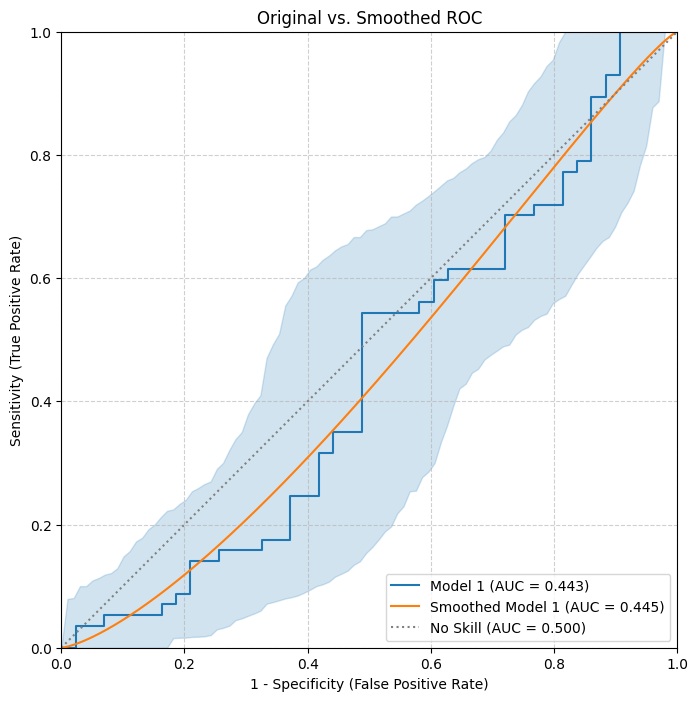

In [9]:
# Smooth the original ROC curve
smoothed_roc = pauc.smooth(roc, method='binormal')

# Plot the original and smoothed curves
pauc.plot_roc([roc, smoothed_roc], title='Original vs. Smoothed ROC')

## 8. Partial AUC (pAUC)

To analyze the AUC in a specific specificity range (e.g., between 90% and 100%), use the `partial_auc()` method. You can also compute a confidence interval for this partial area.



In [12]:
# Calculate pAUC for Model 1 where specificity is between 0.9 and 1.0
pauc_val = roc2.partial_auc(focus="specificity", bounds=(0.9, 1.0))
print(f"Partial AUC (0.9-1.0 spec): {pauc_val:.3f}")

# Get a bootstrap confidence interval for the pAUC
pauc_ci = pauc.ci_auc(roc2, method='bootstrap', bounds=(0.9, 1.0), focus="specificity")
print(f"95% CI for pAUC: ({pauc_ci[0]:.3f}, {pauc_ci[1]:.3f})")

Partial AUC (0.9-1.0 spec): 0.099
95% CI for pAUC: (0.099, 0.099)
